In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
 
# Reading the data
judge_data=pd.read_csv('地方法院_10年rawdata.csv')
 
# Printing number of rows and columns
print(judge_data.shape)
 
# Printing sample rows
judge_data.head(10)

(78253, 8)


,judge_index,judge_year,judge_month,judge_title,judge_NO,judge_court,judge_link,judge_content
0,4,111,1,過失傷害,臺灣彰化地方法院 111 年度 交簡 字第 195 號刑事判決,臺灣彰化地方法院,https://judgment.judicial.gov.tw/FJUD/data.asp...,主文:林燕輝犯汽車駕駛人無駕駛執照駕車過失傷害罪，處拘役參拾伍日，如易科罰金，以新臺幣壹仟元...
1,6,111,1,傷害致重傷害,臺灣彰化地方法院 111 年度 訴 字第 38 號刑事判決,臺灣彰化地方法院,https://judgment.judicial.gov.tw/FJUD/data.asp...,主文:黃鈵淞犯傷害人致重傷罪，處有期徒刑壹年捌月，緩刑參年，緩刑期間付保護管束，並應支付被害...
2,18,111,1,重傷害,臺灣彰化地方法院 110 年度 訴 字第 577 號刑事判決,臺灣彰化地方法院,https://judgment.judicial.gov.tw/FJUD/data.asp...,主文:王枷勛犯傷害罪，處有期徒刑陸月，如易科罰金，以新臺幣壹仟元折算壹日。犯罪事實一、王枷勛...
3,19,111,1,傷害,臺灣彰化地方法院 110 年度 訴 字第 618 號刑事判決,臺灣彰化地方法院,https://judgment.judicial.gov.tw/FJUD/data.asp...,主文:陳燕蓉犯傷害罪，處拘役伍拾日，如易科罰金，以新臺幣壹仟元折算壹日。洪玉芳無罪。犯罪事實...
4,27,111,1,傷害,臺灣彰化地方法院 110 年度 簡上 字第 116 號刑事判決,臺灣彰化地方法院,https://judgment.judicial.gov.tw/FJUD/data.asp...,主文:原判決撤銷。陳博義、王俊吉均無罪。理由一、公訴意旨略以：被告陳博義（綽號毛仔）、被告王...
5,34,111,1,過失傷害,臺灣彰化地方法院 111 年度 交簡 字第 153 號刑事判決,臺灣彰化地方法院,https://judgment.judicial.gov.tw/FJUD/data.asp...,主文:趙威盛犯過失傷害罪，處拘役拾伍日，如易科罰金，以新臺幣壹仟元折算壹日。犯罪事實及理由一...
6,36,111,1,過失傷害,臺灣彰化地方法院 110 年度 交簡 字第 2033 號刑事判決,臺灣彰化地方法院,https://judgment.judicial.gov.tw/FJUD/data.asp...,主文:甲○○犯過失傷害罪，處有期徒刑參月，如易科罰金，以新臺幣壹仟元折算壹日。緩刑伍年，並應...
7,37,111,1,過失傷害,臺灣彰化地方法院 110 年度 交簡 字第 1908 號刑事判決,臺灣彰化地方法院,https://judgment.judicial.gov.tw/FJUD/data.asp...,主文:李佳臻犯過失傷害罪，處拘役伍拾日，如易科罰金，以新臺幣壹仟元折算壹日。事實及理由一、犯...
8,38,111,1,傷害等,臺灣彰化地方法院 110 年度 簡 字第 1754 號刑事判決,臺灣彰化地方法院,https://judgment.judicial.gov.tw/FJUD/data.asp...,主文:江尚權犯傷害罪，處有期徒刑貳月，如易科罰金，以新臺幣壹仟元折算壹日。又犯恐嚇危害安全罪...
9,39,111,1,過失傷害,臺灣彰化地方法院 110 年度 交簡 字第 2027 號刑事判決,臺灣彰化地方法院,https://judgment.judicial.gov.tw/FJUD/data.asp...,主文:張薰云犯過失傷害罪，處有期徒刑參月，如易科罰金，以新臺幣壹仟元折算壹日。犯罪事實及理由...


judge_title
傷害         19590
傷害尊親屬         27
傷害尊親屬等        15
傷害尊親屬罪         6
傷害尊親屬罪等        1
           ...  
重傷害未遂          5
重傷害未遂等         1
重傷害等          49
重傷害致死          2
重傷害致死等         1
Length: 68, dtype: int64


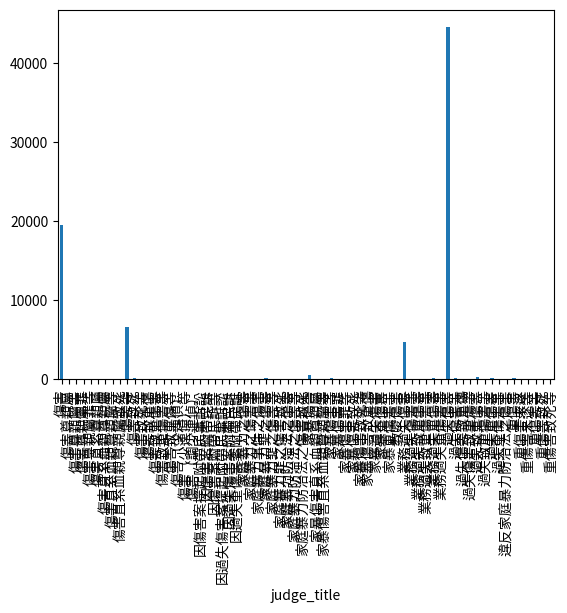

In [9]:
# 設定 matplotlib 字型，可顯示中文
import matplotlib 
import matplotlib.font_manager
# print(matplotlib.__file__)
import matplotlib.pyplot as plt

# a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
# for i in a:
#     print(i)    
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']


print(judge_data.groupby('judge_title').size())

%matplotlib inline
judge_data.groupby('judge_title').size().plot(kind='bar');

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = judge_data['judge_content'].values
y = judge_data['judge_title']

vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(corpus)

# print(vectorizer.get_feature_names())

CountVectorizedData = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
CountVectorizedData['傷害尊親屬罪'] = judge_data['judge_title']
print(CountVectorizedData.shape)
CountVectorizedData.head()

MemoryError: Unable to allocate 2.74 TiB for an array with shape (78253, 4815429) and data type int64